<a href="https://colab.research.google.com/github/Alexmh150/Alexander-Luna/blob/master/Copia_de_Esqueleto_Departamento_de_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TAREA #1: ENTENDER EL ENUNCIADO DEL PROBLEMA Y EL CASO PRÁCTICO


<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=1OjWCpwRHlCSNYaJoUUd2QGryT9CoQJ5e"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Figura 1. Segmentación de Clientes
  </td></tr>
</table>


![alt text](https://drive.google.com/uc?id=1TlILFEVGZHessjmKkUMWL4NHlZ0DcHQb)

![alt text](https://drive.google.com/uc?id=1KaI1zjhARTFAs6X6VwqdsYZecd5EYDMw)

![alt text](https://drive.google.com/uc?id=1Q46sKROZf7jqKus0TfL7agQ5ZnzECiws)

![alt text](https://drive.google.com/uc?id=1zJX7y-J2jhIL17Lh7OroOZvrlblI0u1s)

![alt text](https://drive.google.com/uc?id=1L03HfNPXpLdLlKHk_I6FIj_ahPCuPL0S)

![alt text](https://drive.google.com/uc?id=1i-OPyUph2PGuuZ5FtN0hGX3BkEXCAQNM)

Data Source: https://www.kaggle.com/arjunbhasin2013/ccdata

# TAREA #2: IMPORTAR LAS LIBRERÍAS Y LOS DATASETS

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [3]:
# Necesitarás montar tu disco usando los siguientes comandos:
# Para obtener más información sobre el montaje, consulta esto: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Incluye el link al archivo CSV donde has almacenado tu dataset
creditcard_df = pd.read_csv("/content/drive/My Drive/6 Casos practicos/2. Marketing Department/Marketing_data.csv")
# CUSTID: Identificación del titular de la tarjeta de crédito
# BALANCE: Cantidad de saldo que queda en la cuenta del cliente para hacer compras
# BALANCE_FREQUENCY: Frecuencia de la actualización del saldo, puntuación entre 0 y 1 (1 = actualizado con frecuencia, 0 = no actualizado con frecuencia)
# PURCHASES: Cantidad de compras realizadas desde la cuenta
# ONEOFFPURCHASES: Importe máximo de compra realizado en una sola vez
# INSTALLMENTS_PURCHASES: Importe de la compra realizada en cuotas
# CASH_ADVANCE: Anticipo otorgado al usuario
# PURCHASES_FREQUENCY: frecuencia con la que se realizan las compras, puntuación entre 0 y 1 (1 = compras frecuentes, 0 = compras no frecuentes)
# PURCHASES_FREQUENCY: Frecuencia de las Compras se están realizando, puntuación entre 0 y 1 (1 = compra con frecuencia, 0 = no compra con frecuencia)
# ONEOFF_PURCHASES_FREQUENCY: Con qué frecuencia las compras se realizan de una sola vez (1 = compra con frecuencia, 0 = no compra con frecuencia)
# PURCHASES_INSTALLMENTS_FREQUENCY: Con qué frecuencia se realizan las compras a plazos (1 = se realizan con frecuencia, 0 = no se realizan con frecuencia)
# CASH_ADVANCE_FREQUENCY: con qué frecuencia el gasto se paga por adelantado
# CASH_ADVANCE_TRX: número de transacciones realizadas con "Efectivo por adelantado"
# PURCHASES_TRX: número de transacciones de compras realizadas
# CREDIT_LIMIT: límite de tarjeta de crédito para el usuario
# PAYMENTS: Número de pagos realizados por el usuario
# MINIMUM_PAYMENTS: cantidad mínima de pagos realizados por el usuario
# PRC_FULL_PAYMENT: porcentaje del pago total pagado por el usuario
# TENURE: Años que el usuario lleva usando el servicio de tarjeta de crédito

In [5]:
creditcard_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [6]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
creditcard_df.describe()
# El balance medio es $1564 
# La frecuencia del balance se actualiza bastante a menudo, en promedio ~0.9
# El promedio de las compras es $1000
# El importe máximo de compra no recurrente es en promedio ~$600
# El promedio de la frecuencia de las compras está cerca de 0.5
# El promedio de ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, y CASH_ADVANCE_FREQUENCY es en general bajo
# El promedio del límite de crédito es ~ 4500
# El porcentaje de pago completo es 15%
# Los clientes llevan de promedio en el servicio 11 años

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [8]:
# Vamos a investigar quien ha hecho una compra de $40761!
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] >= 40761.0]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [9]:
creditcard_df['CASH_ADVANCE'].max()

47137.211760000006

In [10]:
# Vamos a ver quien pago por anticipado $47137!
# Este cliente hizo un total de 123 transacciones por adelantado!!
# Nunca paga sus compras completamente con la tarjeta

creditcard_df[creditcard_df['CASH_ADVANCE'] >= 47137.0]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


# TAREA #3: VISUALIZACIÓN DEL DATASET

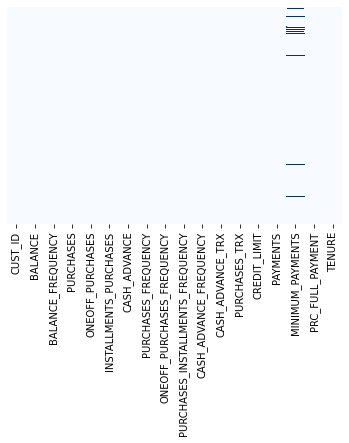

In [11]:
# Comprobemos a ver si tenemos datos faltantes, esperemos que no!
sns.heatmap(creditcard_df.isnull(), yticklabels=False, cbar=False, cmap="Blues")

In [12]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [13]:
# Vamos a rellenar los datos faltantes con el promedio del campo 'MINIMUM_PAYMENT' 
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [14]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [15]:
# Vamos a rellenar los datos faltantes con el promedio del campo 'CREDIT_LIMIT' 
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

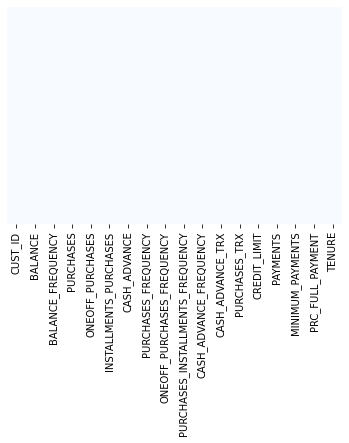

In [16]:
sns.heatmap(creditcard_df.isnull(), yticklabels=False, cbar=False, cmap="Blues")

In [17]:
# Varifiquemos si tenemos entradas duplicadas en nuestros datos 
creditcard_df.duplicated().sum()

0

In [18]:
# Podemos deshacernos del campo Customer ID ya que no nos sirve para nada 
creditcard_df.drop('CUST_ID', axis=1, inplace=True)

In [19]:
creditcard_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [20]:
n = len(creditcard_df.columns)
n

17

In [21]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

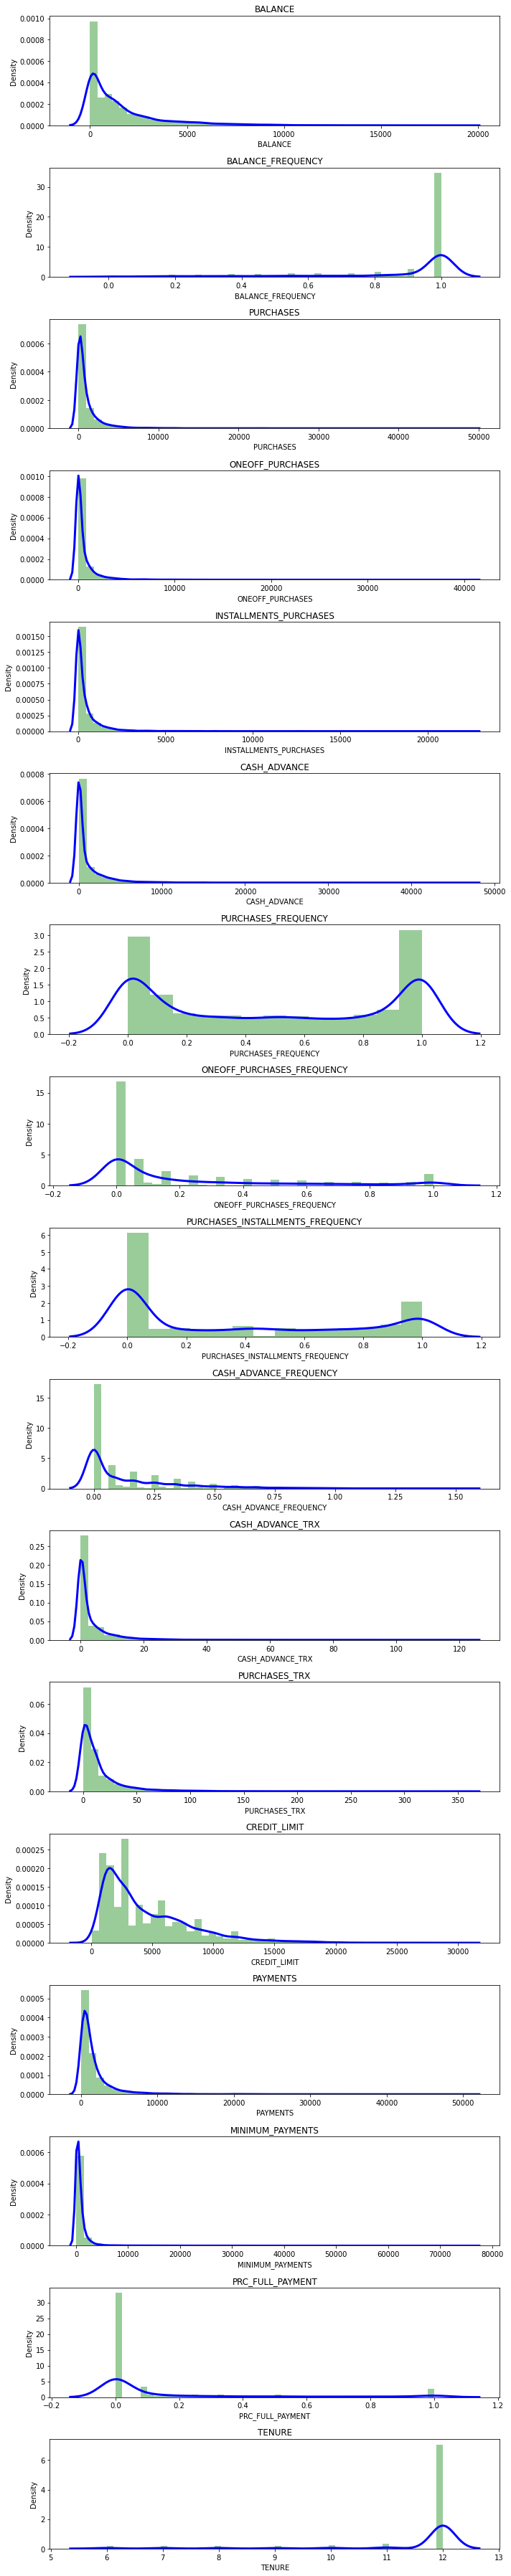

In [22]:
# distplot combina la función matplotlib.hist con la de seaborn kdeplot()
# KDE Plot representa la Kernel Density Estimate
# KDE se utiliza para visualizar la densidad de una probabilidad de una variable continua. 
# KDE nos muestra la densidad de una probabilidad para diferentes valores de una variable continua. 

# El balance promedio es  $1500
# 'Balance_Frequency' para muchos usuarios se actualiza muy frecuentemente ~1
# Para el campo 'PURCHASES_FREQUENCY', hay dos grupos diferentes de clientes
# Para los campos 'ONEOFF_PURCHASES_FREQUENCY' y 'PURCHASES_INSTALLMENT_FREQUENCY' la gran mayoría de usuarios no pagan todo de golpe ni a plazos
# Muy pocos clientes pagan su deuda al completo 'PRC_FULL_PAYMENT'~0
# El promedio del límite del crédito está entorno de los $4500
# La mayoría de clientes llevan ~11 años usando el servicio

plt.figure(figsize=(10,50))
for i in range(n):
  plt.subplot(n, 1, i+1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws = {"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(creditcard_df.columns[i])

plt.tight_layout()

In [23]:
# sns.pairplot(creditcard_df)
# Hay correlación entre 'PURCHASES' y ONEOFF_PURCHASES & INSTALMENT_PURCHASES 
# Se ve una tendencia entre 'PURCHASES' y 'CREDIT_LIMIT' & 'PAYMENTS'


In [24]:
correlations = creditcard_df.corr()

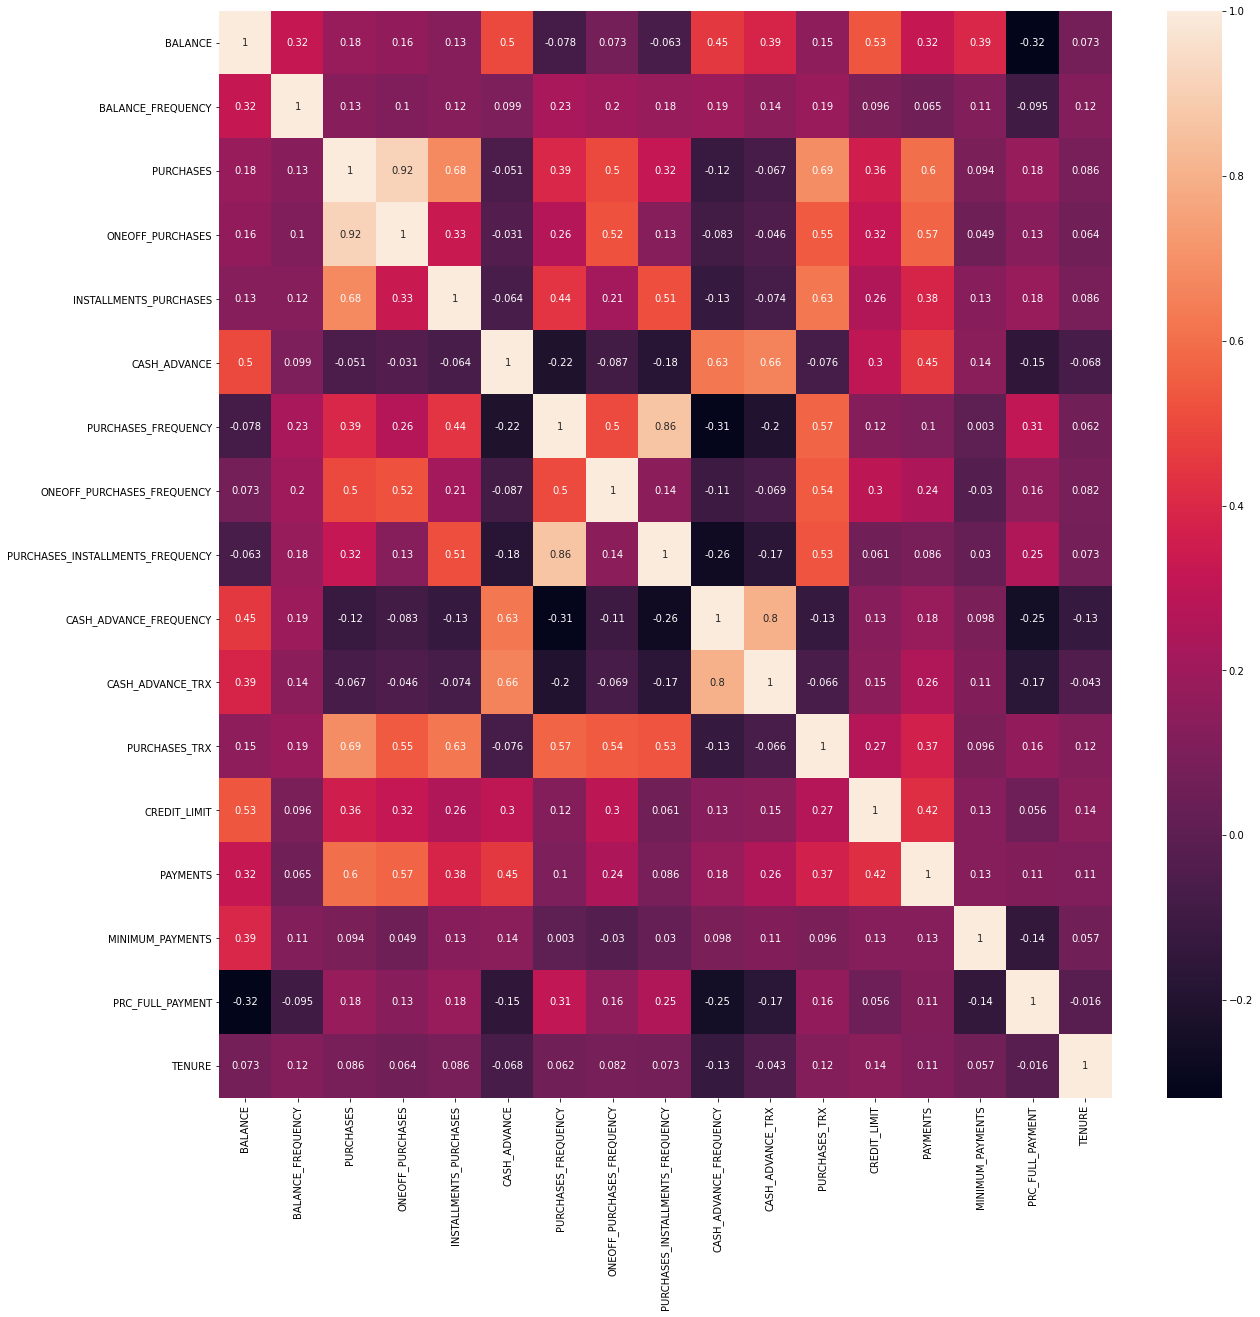

In [25]:
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot=True)
# 'PURCHASES' tienen una alta correlación con one-off purchases, 'installment purchases, purchase transactions, credit limit y payments. 
# Correlación positiva muy elevada entre 'PURCHASES_FREQUENCY' y 'PURCHASES_INSTALLMENT_FREQUENCY'


# TAREA #4: ENTENDER LA TEORÍA DETRÁS DE K-MEANS

![alt text](https://drive.google.com/uc?id=1T2vAOTCInx9l2S9b9H5xm-__h-RLRY5s)

![alt text](https://drive.google.com/uc?id=1eXSerp2FQpxhAa355hKeVT0-tY94ixsw)

![alt text](https://drive.google.com/uc?id=1D12cmll79HCx_Xbt3PSq51PnytJ7DhSr)

![alt text](https://drive.google.com/uc?id=1Syuco6pZ410oP6KbfgCH18s09eB4Hd2H)

![alt text](https://drive.google.com/uc?id=1DQ4KUV66YG-xnZ4xorQFgtkx5EbE2GLI)

![alt text](https://drive.google.com/uc?id=1LzWnRt2w1bLUBGJ7tRK-b4Xudbx54H3D)

![alt text](https://drive.google.com/uc?id=1orzdGxbZPiWlLZcI7EKHAmhnz7T41cV_)

![alt text](https://drive.google.com/uc?id=1ITLmp2XTCUFIM-BPpDWOYmfjxENxywer)

# TAREA #5: ENCONTRAR EL NÚMERO ÓPTIMO DE CLISTERS UTILIZANDO EL MÉTODO DEL CODO

In [26]:
# Empecemos por escalar primero el dataset
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [27]:
creditcard_df_scaled.shape

(8950, 17)

In [28]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

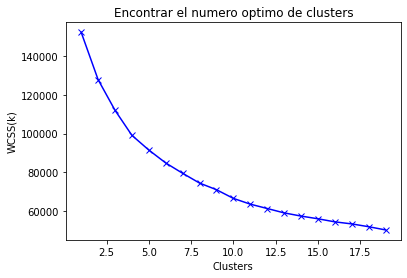

In [29]:
scores_1 = []

range_values = range(1,20)

for i in range_values:
  kmeans = KMeans(n_clusters= i)
  kmeans.fit(creditcard_df_scaled)
  scores_1.append(kmeans.inertia_) #WCSS

plt.plot(range_values, scores_1, 'bx-')
plt.title("Encontrar el numero optimo de clusters")
plt.xlabel("Clusters")
plt.ylabel('WCSS(k)')
plt.show()
# Con el gráfico podemos ver que en 4 clusters es donde se forma el codo de la curva.
# Sin embargo, los valores no se reducen a una forma lineal hasta el 8º cluster. 
# Elijamos pues un número de clusters igual a 8.

# TAREA #6: APLICAR EL MÉTODO DE K-MEANS

In [30]:
kmeans = KMeans(8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [31]:
labels

array([2, 6, 4, ..., 3, 2, 2], dtype=int32)

In [32]:
kmeans.cluster_centers_.shape

(8, 17)

In [33]:
cluster_centers = pd.DataFrame( data = kmeans.cluster_centers_, columns=[creditcard_df.columns])       
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.109761,0.468337,-0.123906,-0.295655,0.249587,-0.034556,-0.096203,-0.557801,0.140950,-0.143235,-0.039176,0.037750,-0.105359,-0.119854,9.509958,-0.520275,0.291491
1,-0.698229,-2.132395,-0.318238,-0.236661,-0.317581,-0.306524,-0.567315,-0.433735,-0.462734,-0.483149,-0.358074,-0.428114,-0.215265,-0.223704,-0.255581,0.250288,-0.163367
2,-0.010025,0.371135,-0.362382,-0.245403,-0.405913,-0.071684,-0.872044,-0.400109,-0.772014,0.149914,-0.017452,-0.490193,-0.337934,-0.265828,-0.072540,-0.454359,-0.011655
3,-0.398239,0.307438,-0.061619,-0.255504,0.323664,-0.359531,0.977279,-0.408596,1.169978,-0.459787,-0.356453,0.135776,-0.321672,-0.241420,-0.120419,0.357726,-0.026014
4,-0.111793,0.395068,0.526882,0.649884,0.051707,-0.328159,0.957259,1.831613,0.186693,-0.405787,-0.330500,0.602352,0.435840,0.130717,-0.153765,0.399815,0.208031
5,1.865907,0.332878,12.596844,13.111182,5.696389,-0.004178,1.033322,2.170634,0.866221,-0.476183,-0.214854,4.566558,3.174197,8.991136,1.064817,1.236317,0.295702
6,1.587941,0.374360,-0.225711,-0.158447,-0.242662,1.970485,-0.474430,-0.200924,-0.426480,1.931096,1.875745,-0.275606,0.970881,0.757309,0.349382,-0.390514,-0.097618
7,1.013127,0.463308,2.529274,1.847531,2.586255,-0.133285,1.166559,1.587712,1.271353,-0.273278,-0.136658,3.145246,1.310604,1.491117,0.363867,0.273835,0.337262


In [34]:
# Para entender mejor estos valores, vamos a aplicar la transformación inversa.
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame( data = cluster_centers, columns=[creditcard_df.columns])  
cluster_centers
# Primer Cluster de Clientes (Transactors): Esos son los clientes que pagan la menor cantidad de cargos por intereses y tienen cuidado con su dinero, Clúster con el saldo más bajo ($ 104) y anticipo en efectivo ($ 303), Porcentaje de pago completo = 23%
# Segundo Cluster de Clientes (revolvers) que usan tarjeta de crédito como préstamo (sector más lucrativo): saldo más alto ($ 5000) y anticipo en efectivo (~ $ 5000), baja frecuencia de compra, alta frecuencia de anticipo en efectivo (0.5), transacciones de anticipo en efectivo alto (16) y bajo porcentaje de pago (3%)
# Tercer Cluster de Clientes (VIP/Prime): límite de crédito alto $ 16K y porcentaje más alto de pago completo, objetivo para aumentar el límite de crédito y aumentar los hábitos de gasto
# Cuarto Cluster de Clientes (low tenure): estos son clientes con baja antigüedad (7 años), saldo bajo


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3874.347938,0.988216,738.477778,101.711296,636.766481,906.404863,0.451740,0.036055,0.420455,0.106481,2.981481,15.648148,4111.111111,1386.179670,23026.762059,0.001543,11.907407
1,111.170530,0.372126,323.283526,199.628938,123.883072,336.076447,0.262660,0.073066,0.180535,0.038461,0.805235,4.068514,3711.227016,1085.543450,268.586773,0.226920,11.298691
2,1543.608077,0.965189,228.970062,185.118107,44.005389,828.545442,0.140357,0.083097,0.057619,0.165144,3.129732,2.525465,3264.905942,963.597530,695.156154,0.020822,11.501721
3,735.573903,0.950100,871.555916,168.352749,703.752560,224.917291,0.882580,0.080566,0.829417,0.043136,0.816298,18.084715,3324.073842,1034.257165,583.574280,0.258343,11.482505
4,1331.788165,0.970859,2128.896656,1671.110931,457.826087,290.706714,0.874545,0.748863,0.438634,0.053942,0.993410,29.682043,6080.213419,2111.557572,505.864419,0.270654,11.795717
5,5448.201718,0.956126,27916.555652,22354.314348,5562.241304,970.110470,0.905072,0.850000,0.708696,0.039855,1.782609,128.217391,16043.478261,27761.600386,3345.718254,0.515316,11.913043
6,4869.640851,0.965953,520.969162,329.447325,191.631042,5111.069326,0.299939,0.142518,0.194943,0.521576,16.049409,7.859291,8026.911434,3925.478891,1678.425961,0.039496,11.386681
7,3673.212841,0.987024,6407.037322,3658.961026,2749.785698,699.367079,0.958547,0.676103,0.869706,0.080458,2.316239,92.888889,9262.962963,6049.781482,1712.183964,0.233807,11.968661


In [35]:
labels.shape

(8950,)

In [36]:
labels.min()

0

In [37]:
labels.max()

7

In [38]:
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)
y_kmeans

array([2, 5, 6, ..., 4, 4, 4], dtype=int32)

In [39]:
# Concatenamos las etiquetas de los clusters con el dataset riginal 
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis=1)
creditcard_df_cluster.head()



,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,6
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,4
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


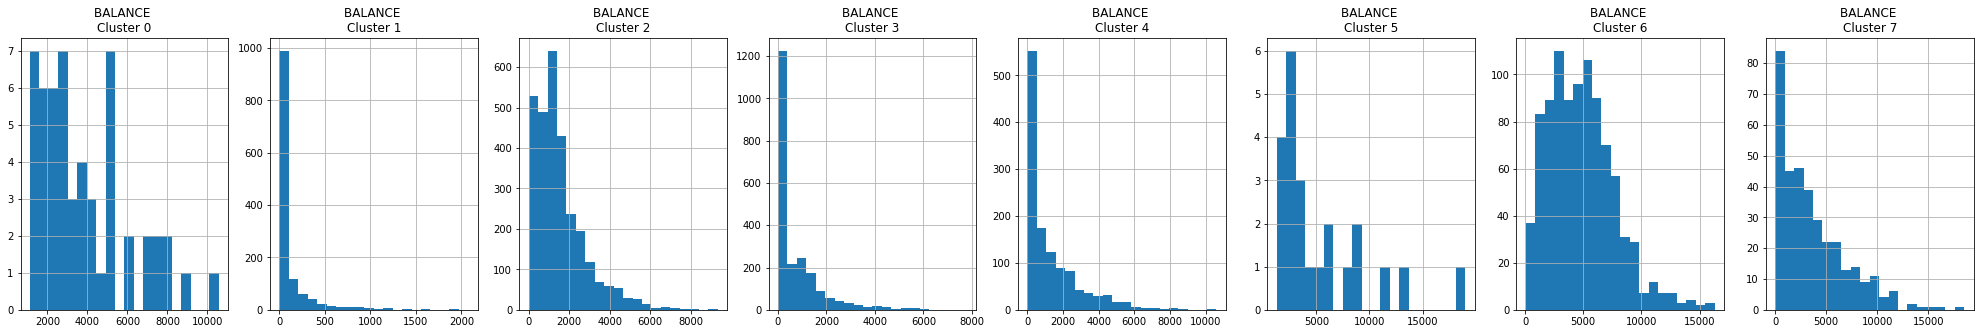

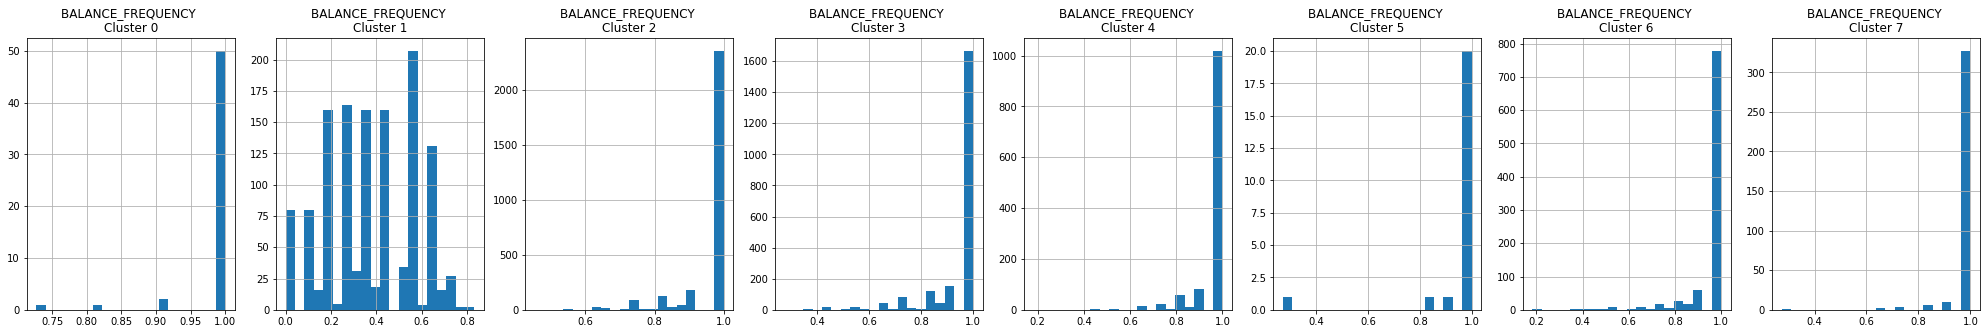

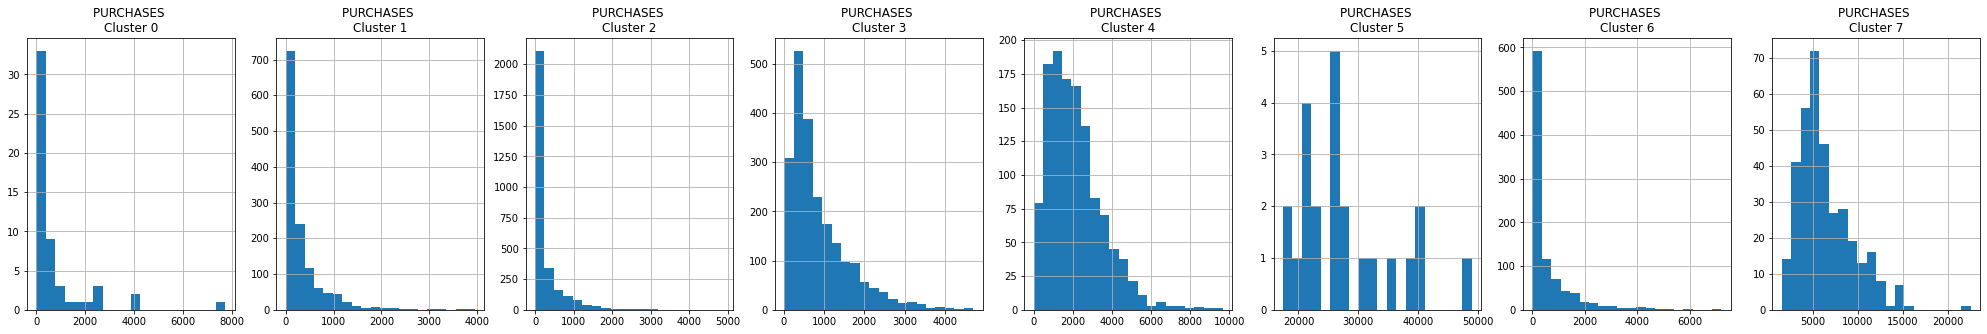

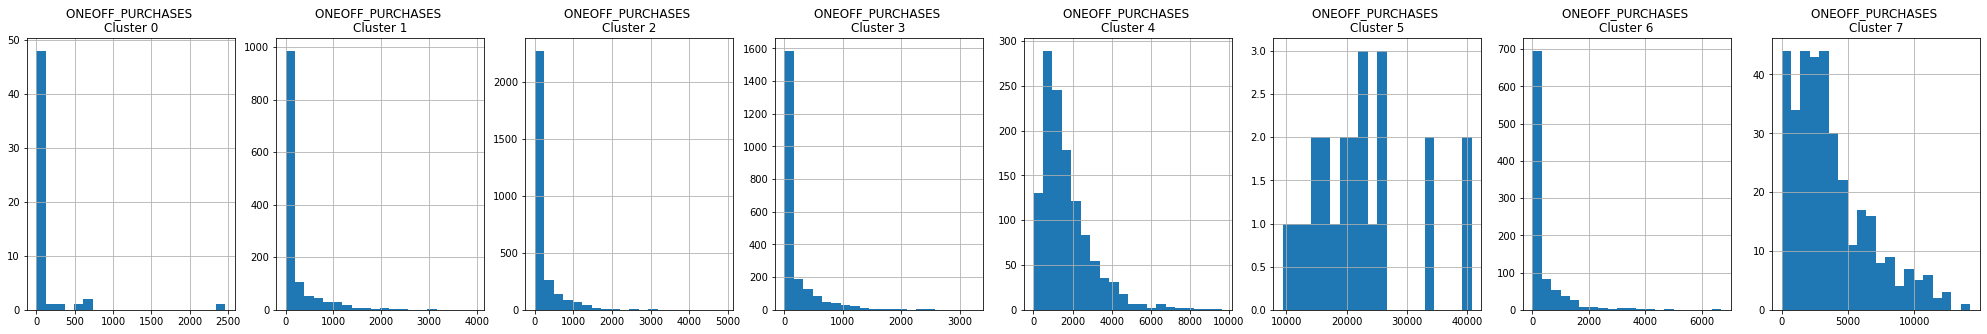

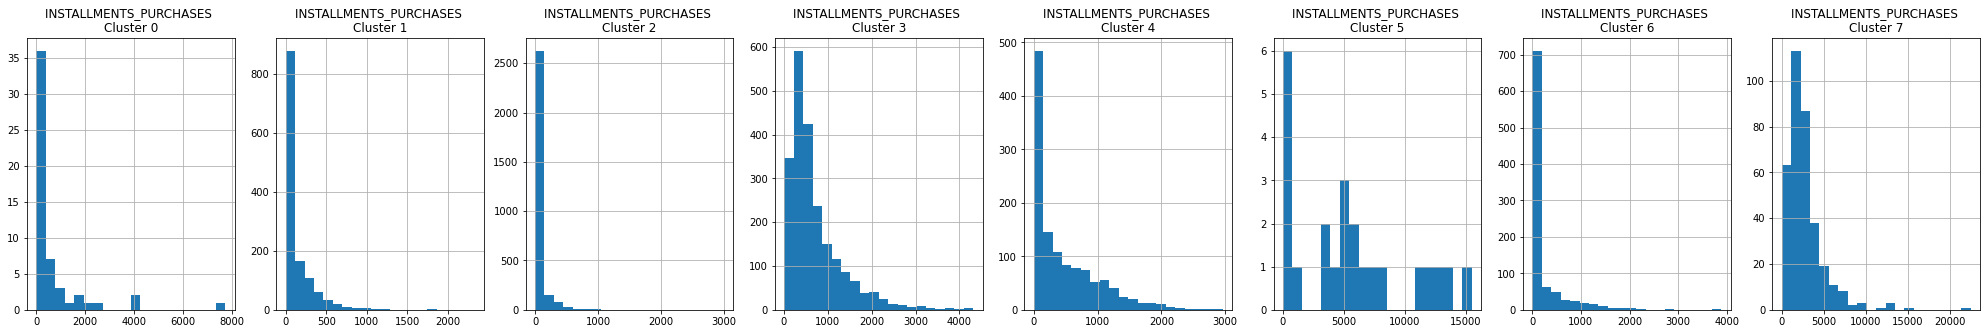

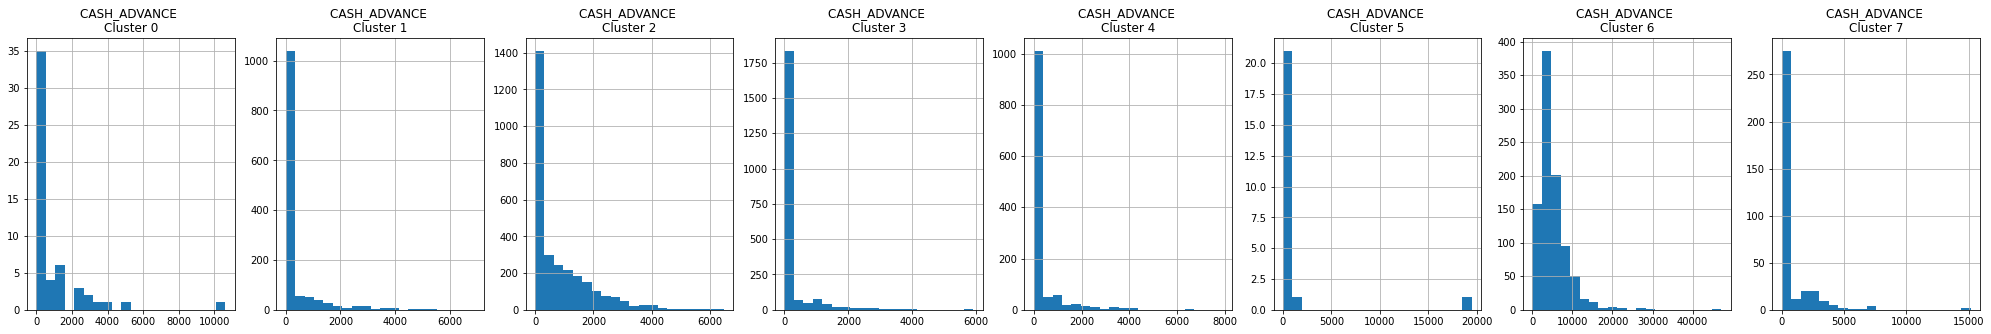

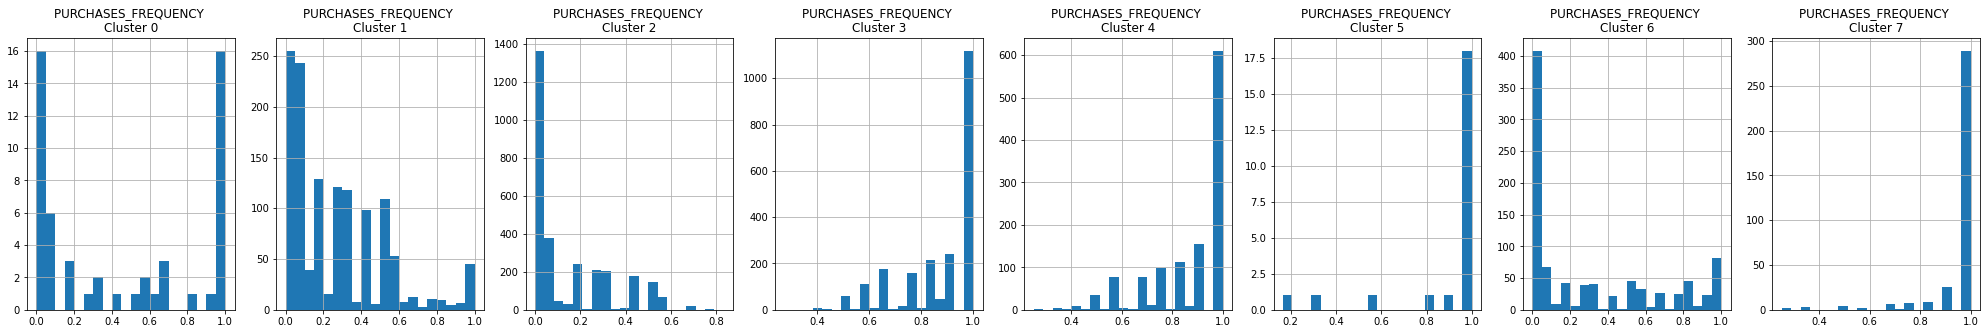

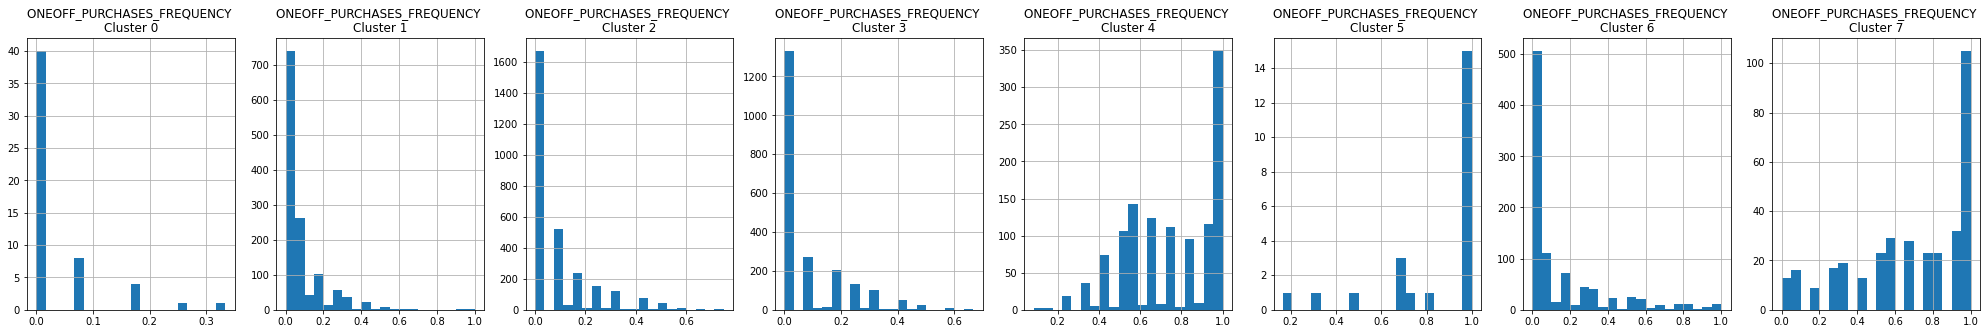

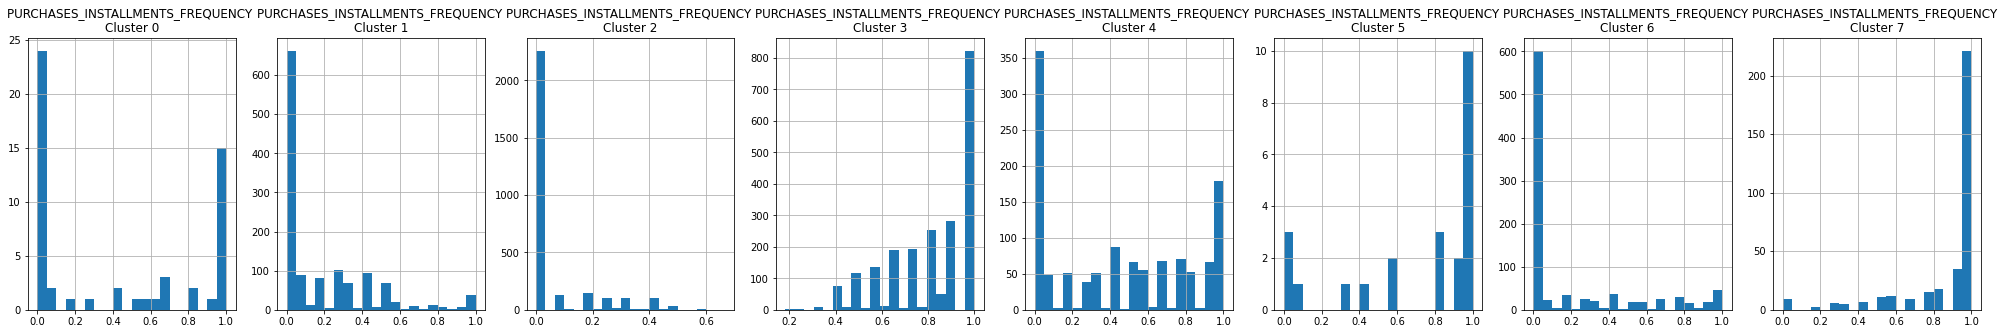

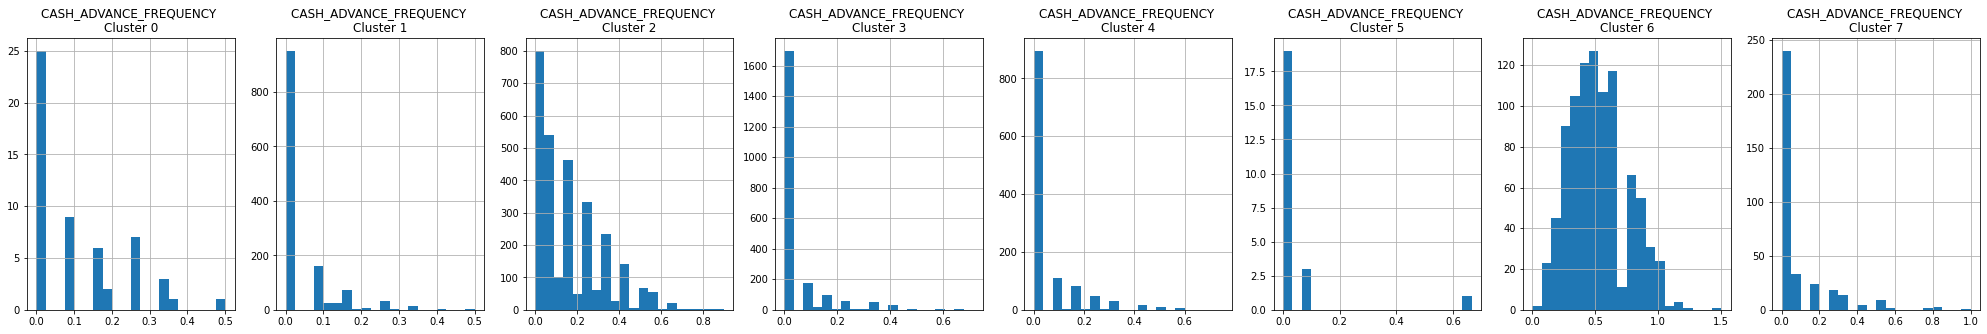

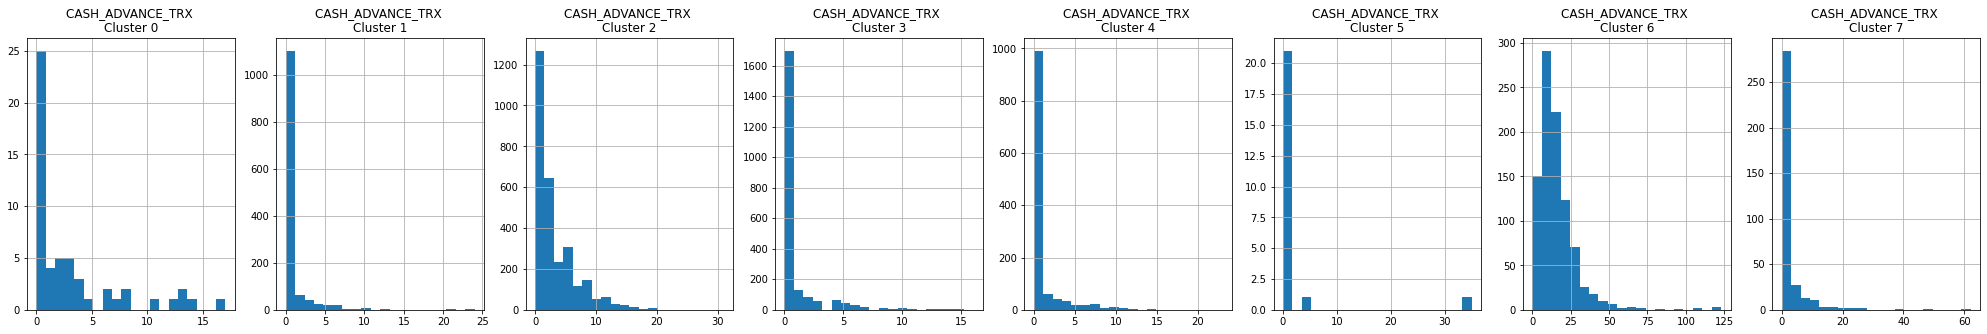

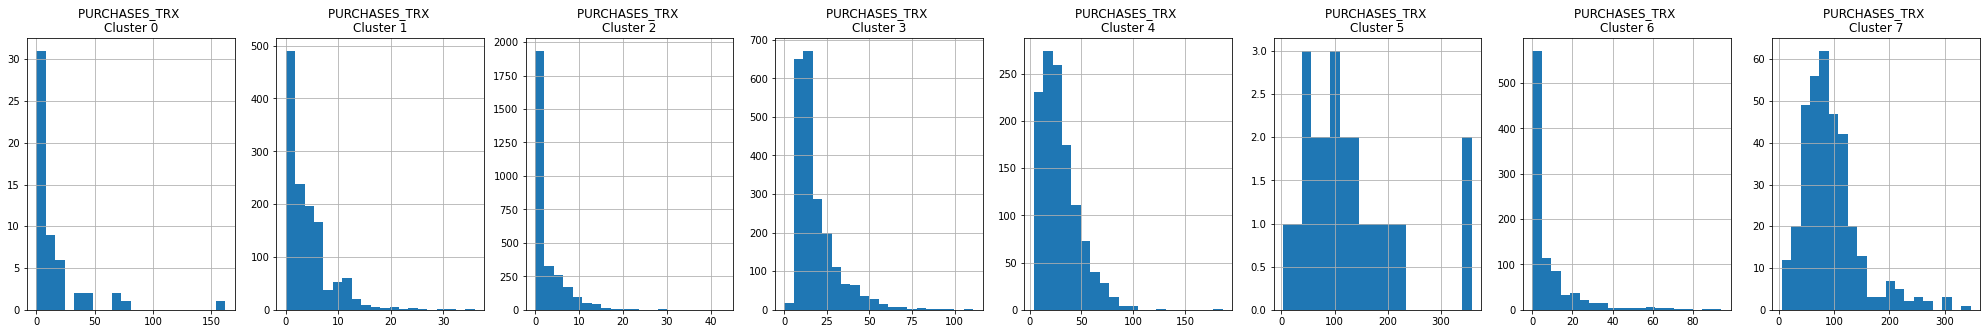

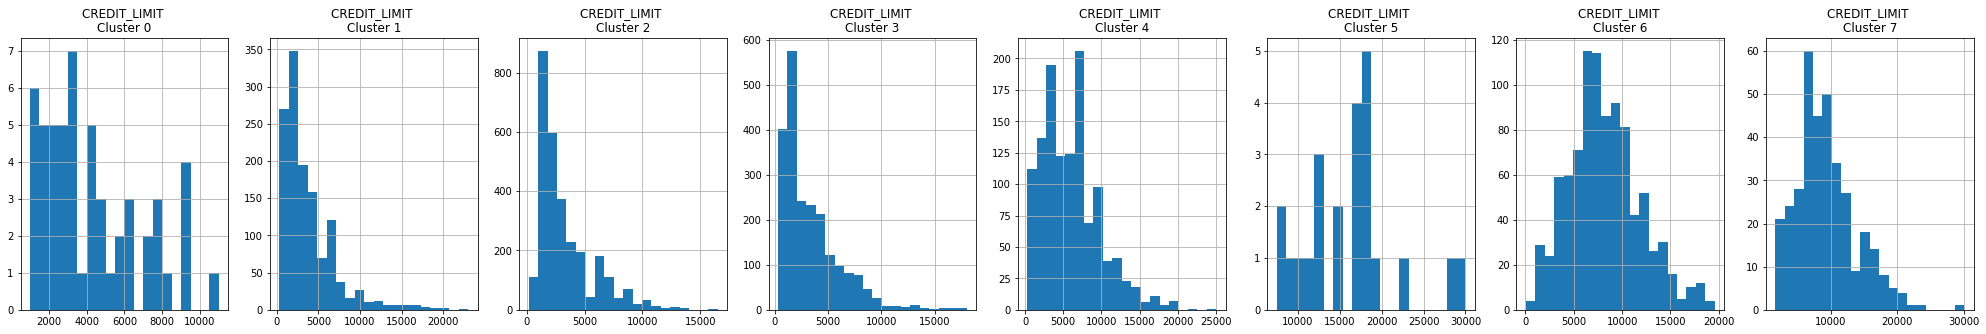

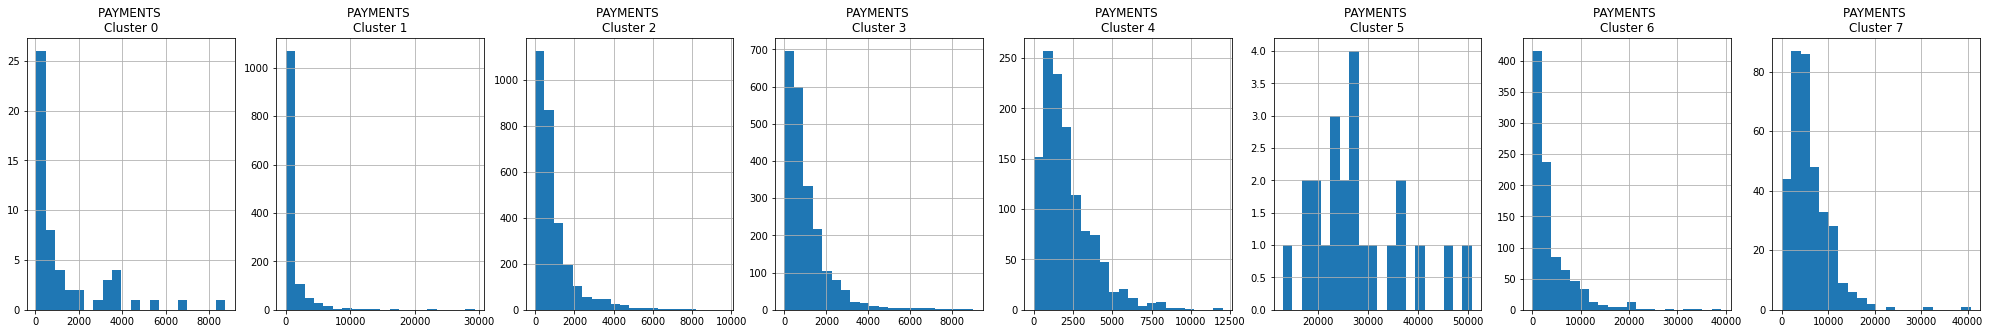

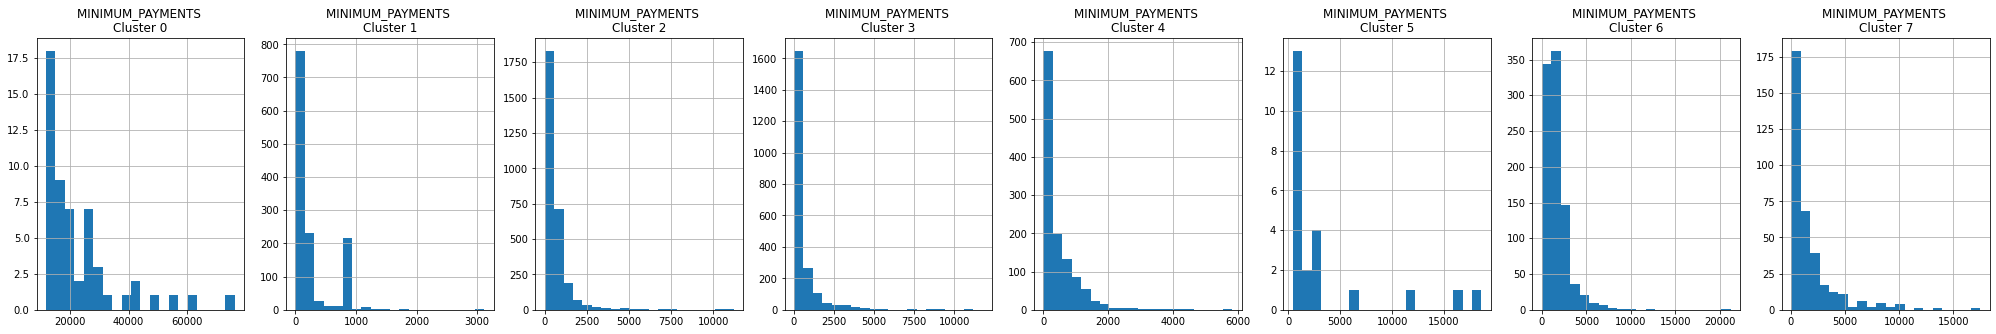

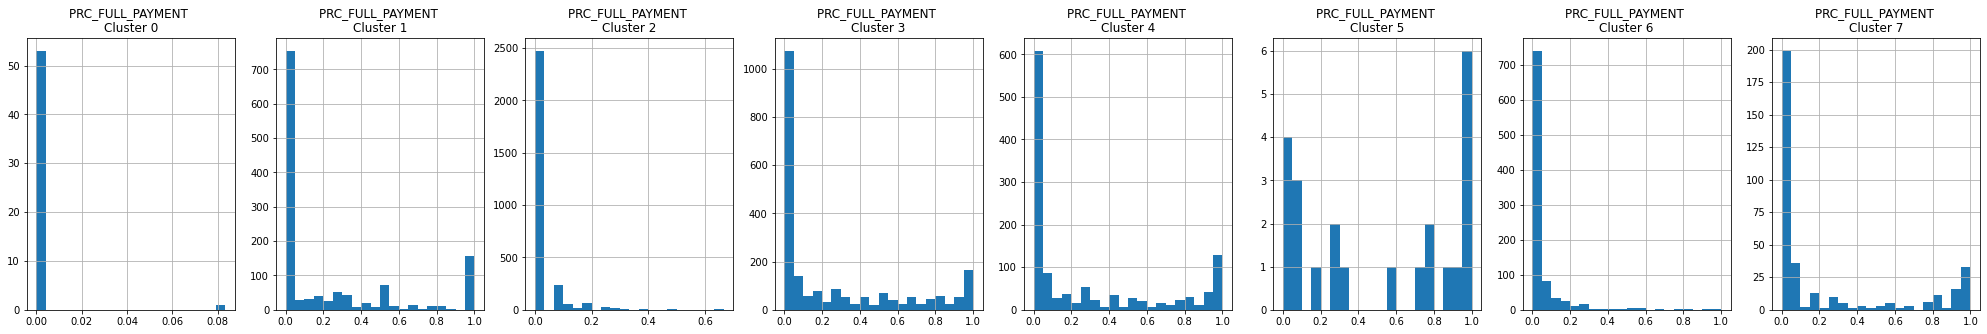

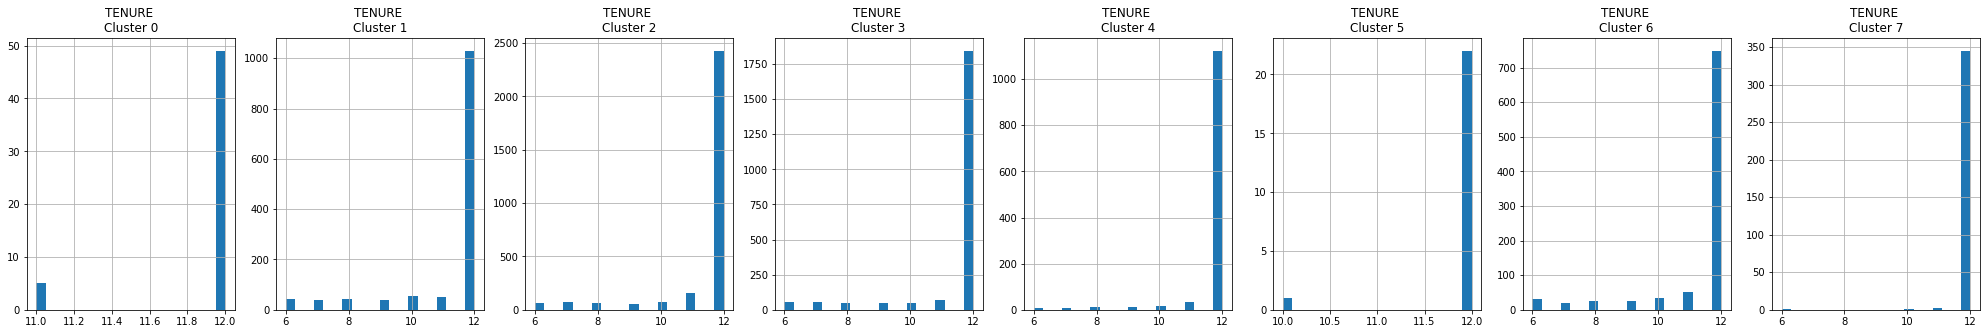

In [40]:
# Visualizamos histogramas para cada cluster 

for i in creditcard_df.columns:
  plt.figure(figsize=(35,5))
  for j in range(8):
    plt.subplot(1,8,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins=20)
    plt.title('{} \nCluster {}'.format(i,j))
    plt.show

# TAREA 7: APLICAR ANÁLISIS DE LAS COMPONENTES PRINCIPALES Y VISUALIZAR LOS RESULTADOS 

![alt text](https://drive.google.com/uc?id=17b_4GsvzJmWt9cnPOcgSGmEelagGSbtL)

In [41]:
# Obtenemos las componentes principales
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68221854, -1.07645447],
       [-1.13829434,  2.50648018],
       [ 0.96968557, -0.38349579],
       ...,
       [-0.92620185, -1.81079367],
       [-2.33655209, -0.65798081],
       [-0.55642674, -0.4004578 ]])

In [42]:
# Creamos un dataframe con las dos componentes 
pca_df = pd.DataFrame(data = principal_comp, columns={'pca1','pca2'})
pca_df.head()

,pca1,pca2
0,-1.682219,-1.076454
1,-1.138294,2.506480
2,0.969686,-0.383496
3,-0.873624,0.043157
4,-1.599433,-0.688582


In [43]:
# Concatenamos las etiquetas de los clusters con el dataframe de las componentes principales
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})],axis = 1)
pca_df

,pca1,pca2,cluster
0,-1.682219,-1.076454,2
1,-1.138294,2.506480,6
2,0.969686,-0.383496,4
3,-0.873624,0.043157,2
4,-1.599433,-0.688582,2
...,...,...,...
8945,-0.359628,-2.016151,3
8946,-0.564364,-1.639143,3
8947,-0.926202,-1.810794,3
8948,-2.336552,-0.657981,2


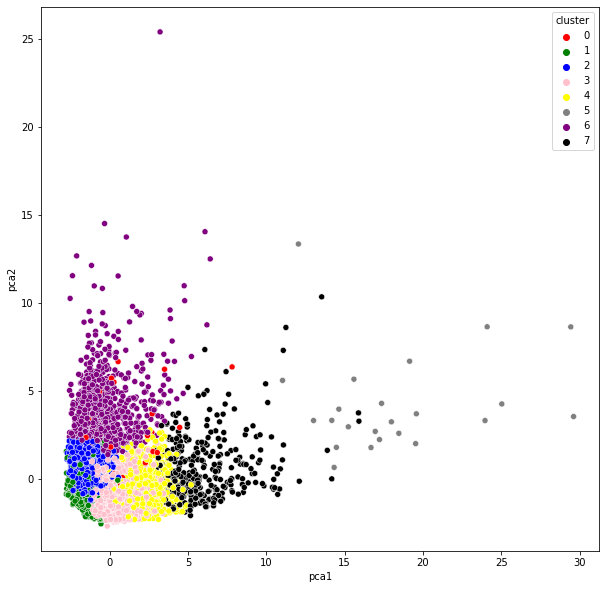

In [44]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x= "pca1", y= "pca2", hue= "cluster", data = pca_df, palette = ["red", "green", "blue", "pink", "yellow", "gray", "purple", "black"])
plt.show()

# TAREA #8: ENTENDER LA TEORÍA Y LA INTUICIÓN DETRÁS DE LOS AUTOENCODERS

![alt text](https://drive.google.com/uc?id=1kY4Ol3OvDd4IaFdrGXB8s-vAa1bhsT6V)

![alt text](https://drive.google.com/uc?id=1qtSiLgN_ZYWV_SPD79xpiapkbHxNmqvb)

![alt text](https://drive.google.com/uc?id=13sf_hXzpb2_bctB5EF7w-pXDV_72J95_)

# TAREA #9: APLICAR LOS AUTOENCODERS (REDUCIR LA DIMENSIÓN DE LOS DATOS CON LOS AUTOENCODERS)

In [45]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD


In [47]:
encoding_dim = 7

input_df = Input(shape = (17,))
#Glorot normal inicializador (Xavier normal initializer) toma muestras aleatorias de una distribucion normal truncada
x = Dense(encoding_dim, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer='glorot_uniform')(x)

encoded = Dense(10, activation='relu', kernel_initializer='glorot_uniform')(x)

x = Dense(2000, activation='relu', kernel_initializer='glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)

decoded = Dense(17, kernel_initializer='glorot_uniform')(x)

autoencoder = Model(input_df,decoded)

encoder = Model(input_df, encoded)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [48]:
creditcard_df_scaled.shape

(8950, 17)

In [49]:
autoencoder.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 17)]              0         
_________________________________________________________________
dense_6 (Dense)              (None, 7)                 126       
_________________________________________________________________
dense_7 (Dense)              (None, 500)               4000      
_________________________________________________________________
dense_8 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_9 (Dense)              (None, 2000)              1002000   
_________________________________________________________________
dense_10 (Dense)             (None, 10)                20010     
_________________________________________________________________
dense_11 (Dense)             (None, 2000)             

In [50]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, batch_size=128, epochs=25, verbose=1)

Epoch 1/25
70/70 [==============================] - 4s 52ms/step - loss: 0.5491
Epoch 2/25
70/70 [==============================] - 4s 52ms/step - loss: 0.3415
Epoch 3/25
70/70 [==============================] - 4s 52ms/step - loss: 0.2847
Epoch 4/25
70/70 [==============================] - 4s 52ms/step - loss: 0.2302
Epoch 5/25
70/70 [==============================] - 4s 52ms/step - loss: 0.1843
Epoch 6/25
70/70 [==============================] - 4s 52ms/step - loss: 0.1657
Epoch 7/25
70/70 [==============================] - 4s 52ms/step - loss: 0.1418
Epoch 8/25
70/70 [==============================] - 4s 52ms/step - loss: 0.1270
Epoch 9/25
70/70 [==============================] - 4s 53ms/step - loss: 0.1148
Epoch 10/25
70/70 [==============================] - 4s 52ms/step - loss: 0.1050
Epoch 11/25
70/70 [==============================] - 4s 52ms/step - loss: 0.0978
Epoch 12/25
70/70 [==============================] - 4s 53ms/step - loss: 0.0930
Epoch 13/25
70/70 [==================

In [52]:
autoencoder.save_weights('autoencoder.h5')

In [54]:
pred = encoder.predict(creditcard_df_scaled)
pred.shape

(8950, 10)

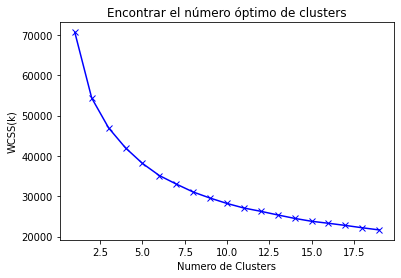

In [55]:
# Tecnica del codo
scores_2 = []

range_values = range(1,20)

for i in range_values:
  kmeans = KMeans(n_clusters= i)
  kmeans.fit(pred)
  scores_2.append(kmeans.inertia_) #WCSS

plt.plot(range_values, scores_2, 'bx-')
plt.title("Encontrar el número óptimo de clusters")
plt.xlabel("Numero de Clusters")
plt.ylabel('WCSS(k)')
plt.show()


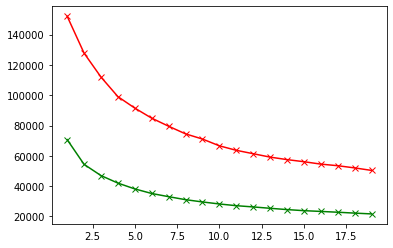

In [57]:
plt.plot(range_values, scores_1, 'bx-', color='r')
plt.plot(range_values, scores_2, 'bx-', color='g')

In [58]:
kmeans = KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(pred)

In [59]:
df_cluster_dr = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster_dr.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


In [64]:
pca = PCA(n_components = 2)
princ_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = principal_comp, columns=['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682219,-1.076454
1,-1.138294,2.506480
2,0.969686,-0.383496
3,-0.873624,0.043157
4,-1.599433,-0.688582


In [65]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis=1)
pca_df

,pca1,pca2,cluster
0,-1.682219,-1.076454,3
1,-1.138294,2.506480,0
2,0.969686,-0.383496,3
3,-0.873624,0.043157,3
4,-1.599433,-0.688582,3
...,...,...,...
8945,-0.359628,-2.016151,1
8946,-0.564364,-1.639143,3
8947,-0.926202,-1.810794,3
8948,-2.336552,-0.657981,3


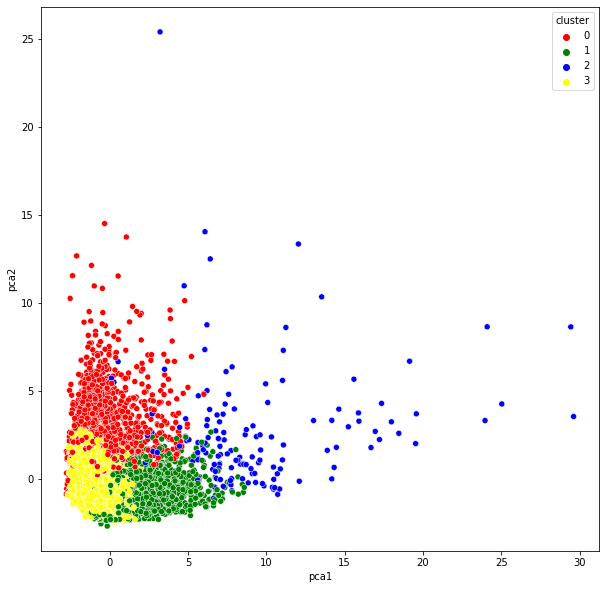

In [68]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x='pca1', y='pca2', hue='cluster', data = pca_df, palette=['red', 'green', 'blue', 'yellow'])
plt.show()

# ¡EXCELENTE TRABAJO! PUEDES ESTAR ORGULLOSO DE TUS HABILIDADES RECIEN ADQUIRIDAS